In [35]:
import matplotlib.pyplot as plt
import matplotlib
from matplotlib import style
from mpl_toolkits.mplot3d import axes3d
import numpy as np
import pandas as pd
from sklearn.metrics import r2_score
import mplcyberpunk

# For Trends file

In [36]:
data_file_name = "coronavirusdataset/trend.csv"

dataset = pd.read_csv(data_file_name)

dataset.isna().sum()   # No NaN Value in the data


date           0
cold           0
flu            0
pneumonia      0
coronavirus    0
dtype: int64

**Preprocessing**

In [37]:
dataset.date = pd.to_datetime(dataset.date)
dataset.head(10)

from sklearn.preprocessing import MinMaxScaler
Scaler = MinMaxScaler(feature_range=(0,10))

for i in range(1, len(dataset.columns)):
    dataset.iloc[:,i] = Scaler.fit_transform(dataset.iloc[:,i].values.reshape((len(dataset.iloc[:,1]), 1)))

dataset

,date,cold,flu,pneumonia,coronavirus
0,2019-12-07,0.057154,1.438948,0.026372,0.000473
1,2019-12-08,0.027346,1.502244,0.003812,0.000000
2,2019-12-09,0.270455,3.562334,0.124896,0.000436
3,2019-12-10,0.143185,2.912797,0.102497,0.001045
4,2019-12-11,0.142693,2.749565,0.099176,0.001018
...,...,...,...,...,...
86,2020-03-02,4.200230,0.398919,0.222206,6.086526
87,2020-03-03,3.094017,0.268114,0.184470,4.716925
88,2020-03-04,3.894990,0.164880,0.147135,3.983550
89,2020-03-05,2.928954,0.069158,0.111916,3.323660


## Comparing the R-Value for finding relation between various deceases with corona virus

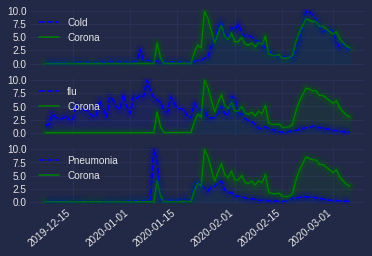

The R Value when the two data are compared is  0.6667868205468783
The R Value when the two data are compared is  -2.637576390907432
The R Value when the two data are compared is  -3.5851791380057927


In [40]:
fig, ax = plt.subplots(3, 1, sharex=True, sharey=True)
fig.autofmt_xdate(rotation=40)

ax[0].plot(dataset.iloc[:,0].values, dataset.iloc[:,1].values, c="b", linestyle="--", label="Cold")
ax[0].plot(dataset.iloc[:,0].values, dataset.iloc[:,4].values, c="g", label="Corona")
ax[0].yaxis.set_major_locator(plt.MaxNLocator(5))
ax[0].legend()
mplcyberpunk.add_glow_effects(ax=ax[0])


ax[1].plot(dataset.iloc[:,0].values, dataset.iloc[:,2].values, c="b", linestyle="--", label="flu")
ax[1].plot(dataset.iloc[:,0].values, dataset.iloc[:,4].values, c="g", label="Corona")
ax[1].yaxis.set_major_locator(plt.MaxNLocator(5))
ax[1].legend()
mplcyberpunk.add_glow_effects(ax=ax[1])


ax[2].plot(dataset.iloc[:,0].values, dataset.iloc[:,3].values, c="b", linestyle="--", label="Pneumonia")
ax[2].plot(dataset.iloc[:,0].values, dataset.iloc[:,4].values, c="g", label="Corona")
ax[2].yaxis.set_major_locator(plt.MaxNLocator(5))
ax[2].legend()
mplcyberpunk.add_glow_effects(ax=ax[2])


plt.style.use('cyberpunk')
plt.show()


print("The R Value when the two data are compared is ",r2_score(dataset.iloc[:,1].values, dataset.iloc[:,4].values))
print("The R Value when the two data are compared is ",r2_score(dataset.iloc[:,2].values, dataset.iloc[:,4].values))
print("The R Value when the two data are compared is ",r2_score(dataset.iloc[:,3].values, dataset.iloc[:,4].values))

# For Patient Files

In [44]:
data_file_name = "coronavirusdataset/patient.csv"

dataset = pd.read_csv(data_file_name)

dataset = dataset[~dataset.id.isnull()]
dataset.isna().sum()

id                     0
sex                 6704
birth_year          6717
country                1
region              6716
disease             7108
group               7051
infection_reason    6990
infection_order     7099
infected_by         7064
contact_number      7084
confirmed_date         1
released_date       7079
deceased_date       7102
state                  1
dtype: int64

**Preprocessing**

In [45]:
date_cols = ["confirmed_date", "released_date", "deceased_date"]
for col in date_cols:
    dataset[col] = pd.to_datetime(dataset[col])

## Age Range With Most Frequent Cases of Corona Virus

[Interval(55.4, 64.3, closed='right'),
 Interval(19.8, 28.7, closed='right'),
 Interval(37.6, 46.5, closed='right'),
 Interval(28.7, 37.6, closed='right'),
 Interval(46.5, 55.4, closed='right'),
 Interval(64.3, 73.2, closed='right'),
 Interval(73.2, 82.1, closed='right'),
 Interval(82.1, 91.0, closed='right'),
 Interval(10.9, 19.8, closed='right'),
 Interval(1.911, 10.9, closed='right')]

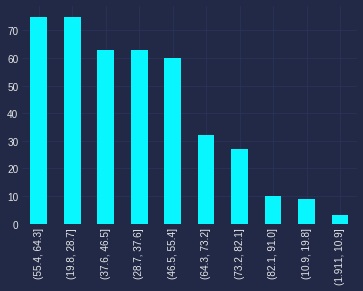

In [47]:
dataset.birth_year.fillna(0.0).astype(int)

dataset.birth_year = pd.to_numeric(dataset.birth_year)
dataset["Age"] = 2020 - dataset.birth_year
dataset["age_range"] = pd.cut(dataset.Age.values, 10)
dataset.age_range.value_counts().plot( kind = "bar")
dataset.age_range.value_counts().index.tolist()

In [48]:
dataset.head(20)

,id,sex,birth_year,country,region,disease,group,infection_reason,infection_order,infected_by,contact_number,confirmed_date,released_date,deceased_date,state,Age,age_range
0,1,female,1984.0,China,filtered at airport,NaN,NaN,visit to Wuhan,1.0,NaN,45.0,2020-01-20,2020-02-06,NaT,released,36.0,"(28.7, 37.6]"
1,2,male,1964.0,Korea,filtered at airport,NaN,NaN,visit to Wuhan,1.0,NaN,75.0,2020-01-24,2020-02-05,NaT,released,56.0,"(55.4, 64.3]"
2,3,male,1966.0,Korea,capital area,NaN,NaN,visit to Wuhan,1.0,NaN,16.0,2020-01-26,2020-02-12,NaT,released,54.0,"(46.5, 55.4]"
3,4,male,1964.0,Korea,capital area,NaN,NaN,visit to Wuhan,1.0,NaN,95.0,2020-01-27,2020-02-09,NaT,released,56.0,"(55.4, 64.3]"
4,5,male,1987.0,Korea,capital area,NaN,NaN,visit to Wuhan,1.0,NaN,31.0,2020-01-30,2020-03-02,NaT,released,33.0,"(28.7, 37.6]"
5,6,male,1964.0,Korea,capital area,NaN,NaN,contact with patient,2.0,3.0,17.0,2020-01-30,2020-02-19,NaT,released,56.0,"(55.4, 64.3]"
6,7,male,1991.0,Korea,capital area,NaN,NaN,visit to Wuhan,1.0,NaN,9.0,2020-01-30,2020-02-15,NaT,released,29.0,"(28.7, 37.6]"
7,8,female,1957.0,Korea,Jeollabuk-do,NaN,NaN,visit to Wuhan,1.0,NaN,113.0,2020-01-31,2020-02-12,NaT,released,63.0,"(55.4, 64.3]"
8,9,female,1992.0,Korea,capital area,NaN,NaN,contact with patient,2.0,5.0,2.0,2020-01-31,2020-02-24,NaT,released,28.0,"(19.8, 28.7]"
9,10,female,1966.0,Korea,capital area,NaN,NaN,contact with patient,3.0,6.0,43.0,2020-01-31,2020-02-19,NaT,released,54.0,"(46.5, 55.4]"


In [49]:
Time_info = pd.DataFrame()
Time_info["Time_To_Release"] = dataset["released_date"] - dataset["confirmed_date"]
Time_info["Time_to_Death"] = dataset["deceased_date"] - dataset["confirmed_date"]
Time_info["Confirmation_Duration"] = Time_info[["Time_To_Release", "Time_to_Death"]].min(axis = 1)
Time_info[~Time_info.Confirmation_Duration.isnull()]

,Time_To_Release,Time_to_Death,Confirmation_Duration
0,17 days,NaT,17 days
1,12 days,NaT,12 days
2,17 days,NaT,17 days
3,13 days,NaT,13 days
4,32 days,NaT,32 days
...,...,...,...
5142,NaT,1 days,1 days
5459,NaT,1 days,1 days
5766,NaT,0 days,0 days
5767,NaT,0 days,0 days


## Increase in the confirmed cases of Corona Virus

confirmed_date
2020-03-01    1062
2020-02-29     813
2020-03-02     600
Name: id, dtype: int64


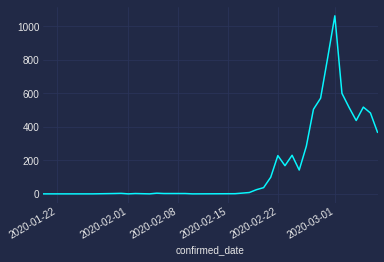

In [50]:
print(dataset.groupby(dataset.confirmed_date).id.count().sort_values(ascending=False).head(3))
dataset.groupby(dataset.confirmed_date).id.count().plot()

In [51]:
z = dataset.groupby(dataset.state).id.count()
Total_State = 0
for i in z:
    Total_State += i
State = z.index.tolist()
for i in range(len(State)):
    print("The Percentage of " + str(State[i]) + " is " + str((z[i]/Total_State)*100))

The Percentage of deceased is 0.43459974765175946
The Percentage of isolated is 98.79433618393382
The Percentage of released is 0.7710640684144119


# For Time.csv File

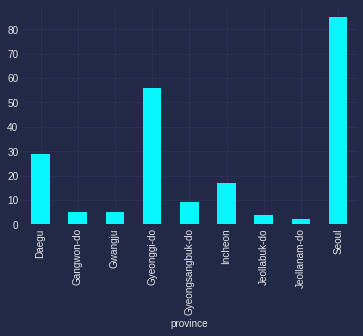

In [52]:
data_file_name = "coronavirusdataset/route.csv"

data = pd.read_csv(data_file_name)
data.groupby(data.province).id.count().plot(kind = "bar")

***Seoul is the most affected city in South Korea***

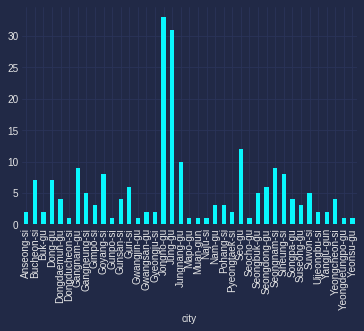

In [53]:
data.groupby(data.city).id.count().plot(kind = "bar", stacked= True)

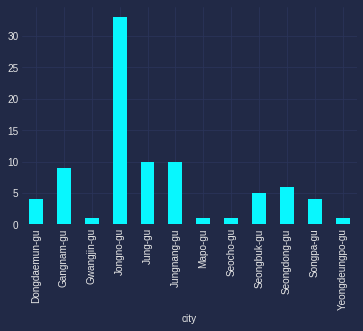

In [54]:
data[data.province == "Seoul"].groupby(data.city).id.count().plot(kind = "bar")